## Q1. Beer grouping use case

Company X would like to enter the market with a new beer brand. Before it decides the kind of beer it will launch, it must understand what kinds of products already exist in the market and what kinds of segments the products address. To understand the segments, the company collects specifications of few samples of beer brands (as given in the Beer Dataset). 

Please refer to Beer Grouping dataset on GitHub - 
https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/blob/main/ClassAssignment/Assignment10/Beer_Grouping.xlsx 

Assuming there are 3 segments, use K-Means Algorithm to create three clusters using the Beer Dataset. Once the clusters are finalized, interpret the clusters.

In [81]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
import scipy.cluster.hierarchy as sch

In [6]:
df_beer = pd.read_excel('Beer_Grouping.xlsx')

In [7]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      20 non-null     object 
 1   Calories  20 non-null     int64  
 2   Sodium    20 non-null     int64  
 3   Alcohol   20 non-null     float64
 4   Cost      20 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


In [8]:
df_beer.head()

,Name,Calories,Sodium,Alcohol,Cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [20]:
col_num_beer = ['Calories', 'Sodium', 'Alcohol', 'Cost']

array_beer_std = StandardScaler().fit_transform(df_beer[col_num_beer])

df_beer_std = pd.DataFrame(array_beer_std, columns = col_num_beer)

In [21]:
df_beer_std.insert(0, 'Name', df_beer['Name'])


df_beer_std.head()

,Name,Calories,Sodium,Alcohol,Cost
0,Budweiser,0.387913,0.007795,0.433808,-0.456830
1,Schlitz,0.625066,0.631369,0.622420,-0.456830
2,Lowenbrau,0.828339,0.007795,-3.149822,-0.102698
3,Kronenbourg,1.268765,-1.239354,0.905338,1.667960
4,Heineken,0.658944,-0.615780,0.716726,1.951265


In [40]:
import warnings
warnings.filterwarnings('ignore')

x = df_beer_std[col_num_beer]

sse, db, slc = {}, {}, {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10, random_state=123).fit(x)
    clusters = kmeans.labels_
    sse[k] = round(kmeans.inertia_,3)
    db[k] = round(davies_bouldin_score(x, clusters),3)
    slc[k] = round(silhouette_score(x, clusters),3)   



In [41]:
for k in slc:
    print('The average silhouette score for n_clusters = ', k, 'is', slc[k])



The average silhouette score for n_clusters =  2 is 0.331
The average silhouette score for n_clusters =  3 is 0.458
The average silhouette score for n_clusters =  4 is 0.475
The average silhouette score for n_clusters =  5 is 0.444
The average silhouette score for n_clusters =  6 is 0.365
The average silhouette score for n_clusters =  7 is 0.339
The average silhouette score for n_clusters =  8 is 0.298
The average silhouette score for n_clusters =  9 is 0.294
The average silhouette score for n_clusters =  10 is 0.267
The average silhouette score for n_clusters =  11 is 0.255
The average silhouette score for n_clusters =  12 is 0.268
The average silhouette score for n_clusters =  13 is 0.258
The average silhouette score for n_clusters =  14 is 0.195
The average silhouette score for n_clusters =  15 is 0.184
The average silhouette score for n_clusters =  16 is 0.123
The average silhouette score for n_clusters =  17 is 0.133
The average silhouette score for n_clusters =  18 is 0.098
The a

In [43]:
max_value = max(slc, key=slc.get)
print('The n_clusters with the max average silhouette score is',max_value)

The n_clusters with the max average silhouette score is 4


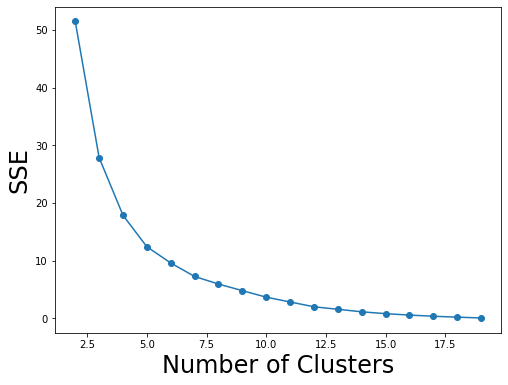

In [90]:
plt.figure(figsize=(8, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of Clusters', fontsize=24)
plt.ylabel('SSE', fontsize=24)
plt.show()

#### Though the optimal number of clusters is 4, we will go ahead with k = 3 as it has been instructed in the question

In [44]:
k_means_ans = KMeans(n_clusters = 3, max_iter = 1000, n_init = 10, random_state=123).fit(x)



In [45]:
print(k_means_ans.labels_)

[2 2 1 0 0 2 2 2 1 1 2 1 1 0 0 1 2 2 1 1]


In [52]:
df_beer['Cluster'] = k_means_ans.labels_

df_beer.loc[df_beer['Cluster'] == 0]

,Name,Calories,Sodium,Alcohol,Cost,Cluster
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
13,Becks,150,19,4.7,0.76,0
14,Kirin,149,6,5.0,0.79,0


In [53]:
df_beer.loc[df_beer['Cluster'] == 1]

,Name,Calories,Sodium,Alcohol,Cost,Cluster
2,Lowenbrau,157,15,0.9,0.48,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


In [54]:
df_beer.loc[df_beer['Cluster'] == 2]

,Name,Calories,Sodium,Alcohol,Cost,Cluster
0,Budweiser,144,15,4.7,0.43,2
1,Schlitz,151,19,4.9,0.43,2
5,Old_Milwaukee,145,23,4.6,0.28,2
6,Augsberger,175,24,5.5,0.40,2
7,Srohs_Bohemian_Style,149,27,4.7,0.42,2
10,Coors,140,18,4.6,0.44,2
16,Hamms,139,19,4.4,0.43,2
17,Heilemans_Old_Style,144,24,4.9,0.43,2


#### The interpretation is that, the Cluster 0 contains brands with high alchohol content (close to 5%). The Clusters 1 & 2 contain low alcohol but the sodium level is higher for Cluster 2 in comparision to Cluster 1

## Q2. Distance measures on universities dataset

Please refer to the Universities.xlsx on GitHub: (https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/blob/main/ClassAssignment/Assignment10/Universities.xlsx ). 

- a) Find out the Euclidean distance between Stanford and MIT. 
- b) Find out the Manhattan distance between Stanford and MIT. 
- c) What difference you can convey for Manhattan distance w.r.t. Euclidean distance measure?

In [55]:
df_uni = pd.read_excel('Universities.xlsx')
df_uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Brown,1310,89,22,13,22704,94,NaN,NaN,NaN,NaN
1,CalTech,1415,100,25,6,63575,81,NaN,NaN,Features:,NaN
2,CMU,1260,62,59,9,25026,72,NaN,NaN,Univ,University
3,Columbia,1310,76,24,12,31510,88,NaN,NaN,SAT,Average SAT scores of new freshmen
4,Cornell,1280,83,33,13,21864,90,NaN,NaN,Top10,Percentage of new freshmen in the Top 10% of c...


In [60]:
nan_check_cols = ['Unnamed: 9', 'Unnamed: 10']

df_uni[nan_check_cols]

,Unnamed: 9,Unnamed: 10
0,NaN,NaN
1,Features:,NaN
2,Univ,University
3,SAT,Average SAT scores of new freshmen
4,Top10,Percentage of new freshmen in the Top 10% of c...
5,Accept,Percentage of applicants accepted
6,SFRatio,Student to Faculty Ratio
7,Expenses,Estimated Annual Expenses
8,GradRate,Graduation Rate Percent
9,NaN,NaN


In [61]:
## We can drop the columns with mostly NaN or irrelevant data

drop_cols = ['Unnamed: 7','Unnamed: 8','Unnamed: 9', 'Unnamed: 10']


df_uni = df_uni.drop(columns = drop_cols)

df_uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [63]:
options = ['Stanford', 'MIT']
df_uni_q = df_uni[ df_uni['Univ'].isin(options)]

df_uni_q

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
10,MIT,1380,94,30,10,34870,91
16,Stanford,1360,90,20,12,36450,93


In [66]:
#Calculating the Euclidean distance

from scipy.spatial import distance
calculation_cols = ['SAT','Top10','Accept','SFRatio','GradRate']
stanford = df_uni_q[df_uni_q['Univ'] == 'Stanford'][calculation_cols]
mit = df_uni_q[df_uni_q['Univ'] == 'MIT'][calculation_cols]

distance.euclidean(stanford, mit)

22.891046284519195

In [68]:
distance.cityblock(stanford, mit)

38

#### Ans - The Euclidean distance is 22.89 and the Manhattan distance is 38.  Given the low dimensionality of the data and also domain knowledge not suggesting manhattan distance, we should prefer the Euclidean distance. Reference article below:

https://medium.com/@kunal_gohrani/different-types-of-distance-metrics-used-in-machine-learning-e9928c5e26c7

## Q3. Distance measures comparison

What is the Euclidean distance between two points (2,4,6) and (3,8)? What is the Manhattan distance in the above case?

In [70]:
arr1 = [2,4,6]
arr2 = [3,8,0] # Assuming the third point to be zero

distance.euclidean(arr1,arr2)

7.280109889280518

In [71]:
distance.cityblock(arr1,arr2)

11

#### The Euclidean distance is 7.28 and the Manhattan Distance is 11

## Q4. Customer Segmentation use case

One of the large smart phone manufacturing giants is analyzing it's customer satisfaction and loyalty data. Here is a sample they have captured from a geography for certain period for analysis purposes. As a Data Scientist, you are tasked to analyze the segmentation pattern and recommend your inferences.


The dataset is here on GitHub - https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/blob/main/ClassAssignment/Assignment10/Satisfaction_Loyalty.csv


Dataset has two features captured here for analysis consideration - Satisfactory index and Loyalty index of customers. Use clustering methods and provide your inference.

In [74]:
df_csat = pd.read_csv('Satisfaction_Loyalty.csv')

df_csat.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [75]:
df_csat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


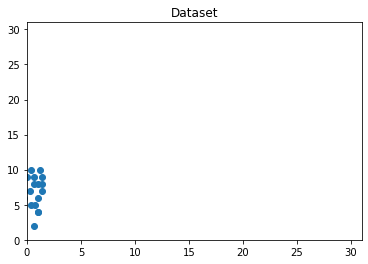

In [79]:
x_axis =  df_csat['Loyalty']
y_axis = df_csat['Satisfaction']

plt.plot()
plt.xlim([0,31])
plt.ylim([0,31])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.show()

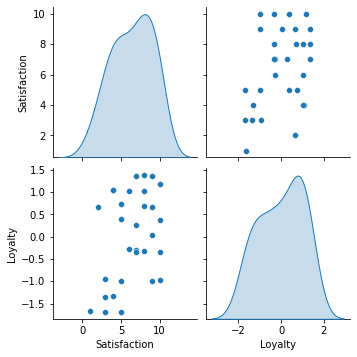

In [80]:
sns.pairplot(df_csat, diag_kind= 'kde')


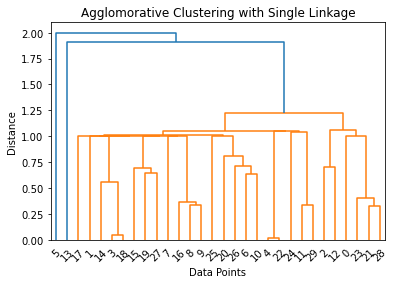

<Figure size 5760x5760 with 0 Axes>

In [89]:
Z = sch.linkage(df_csat, method = 'single')

den = sch.dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Agglomorative Clustering with Single Linkage')

plt.figure(figsize=(80, 80))

plt.show()

In [93]:
sse_csat,slc_csat = {},{}

for k in range(2,30):
    h_cluster_model = AgglomerativeClustering(n_clusters = k, linkage = 'average').fit(df_csat)
    cluster_labels = h_cluster_model.labels_
    slc_csat[k] = round(silhouette_score(df_csat,cluster_labels, metric = 'euclidean'),3)

print(slc_csat)
    

{2: 0.534, 3: 0.423, 4: 0.378, 5: 0.265, 6: 0.357, 7: 0.333, 8: 0.357, 9: 0.364, 10: 0.385, 11: 0.36, 12: 0.368, 13: 0.393, 14: 0.389, 15: 0.379, 16: 0.389, 17: 0.364, 18: 0.358, 19: 0.334, 20: 0.311, 21: 0.296, 22: 0.28, 23: 0.28, 24: 0.251, 25: 0.216, 26: 0.197, 27: 0.15, 28: 0.126, 29: 0.065}


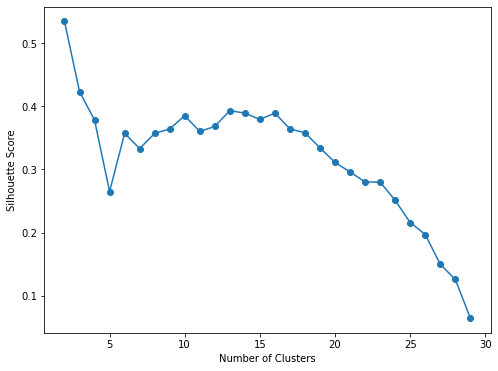

In [99]:
plt.figure(figsize=(8, 6))
plt.xlabel('Number of Clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)


plt.plot(slc_csat.keys(), slc_csat.values(), marker = 'o' )

plt.show()

#### Thus we can observe that the max value of the average silhouette score is close 0.53 but since that would give us a total of only 2 clusters, we would go ahead with k = 3. It gives an average silhouette score of 0.423 which is the second highest. 

In [100]:
h_cluster_model_final = AgglomerativeClustering(n_clusters = 3, linkage = 'average').fit(df_csat)
cluster_labels_final = h_cluster_model_final.labels_

df_csat['cluster'] = cluster_labels_final

df_csat.head()

,Satisfaction,Loyalty,cluster
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,2


In [101]:
df_csat[df_csat.cluster == 0]

,Satisfaction,Loyalty,cluster
5,1,-1.66,0
13,2,0.67,0


In [104]:
df_csat_cluster_1 = df_csat[df_csat.cluster == 1]
df_csat_cluster_1['Satisfaction'].value_counts() 

7     4
8     4
9     4
10    4
6     2
Name: Satisfaction, dtype: int64

In [105]:
df_csat_cluster_2 = df_csat[df_csat.cluster == 2]
df_csat_cluster_2['Satisfaction'].value_counts() 

5    4
3    3
4    3
Name: Satisfaction, dtype: int64

#### The interpretation is that, Cluster 0 includes customers with very low satisfaction scores, Cluster 1 has customers with csat scores in the range of 3-5, and Cluster 2 has customers with csat scores in the range of 6-10. Given the nature of the data, we can try with 4 clusters to get a better idea of the highly satisfied customers. 

In [108]:
h_cluster_model_final_k4 = AgglomerativeClustering(n_clusters = 4, linkage = 'average').fit(df_csat)
cluster_labels_final_k4 = h_cluster_model_final_k4.labels_

df_csat['cluster_k4'] = cluster_labels_final_k4

df_csat.head()

,Satisfaction,Loyalty,cluster,cluster_k4
0,4,-1.33,2,2
1,6,-0.28,1,0
2,5,-0.99,2,2
3,7,-0.29,1,0
4,4,1.06,2,2


In [109]:
df_csat['cluster_k4'].value_counts()

0    18
2    10
1     1
3     1
Name: cluster_k4, dtype: int64

In [110]:
df_csat_k4_cluster_0 = df_csat[df_csat.cluster_k4 == 0]
df_csat_k4_cluster_0['Satisfaction'].value_counts() 

7     4
8     4
9     4
10    4
6     2
Name: Satisfaction, dtype: int64

In [111]:
df_csat_k4_cluster_1 = df_csat[df_csat.cluster_k4 == 1]
df_csat_k4_cluster_1['Satisfaction'].value_counts() 

2    1
Name: Satisfaction, dtype: int64

In [112]:
df_csat_k4_cluster_2 = df_csat[df_csat.cluster_k4 == 2]
df_csat_k4_cluster_2['Satisfaction'].value_counts() 

5    4
3    3
4    3
Name: Satisfaction, dtype: int64

In [113]:
df_csat_k4_cluster_3 = df_csat[df_csat.cluster_k4 == 3]
df_csat_k4_cluster_3['Satisfaction'].value_counts() 

1    1
Name: Satisfaction, dtype: int64

#### Since the customers in the range of 6-10 remain in a single cluster, even after taking 4 clusters, we can prefer the earlier model with 3 clusters. The interpreation remains the same. Cluster 0 includes customers with very low satisfaction scores, Cluster 1 has customers with csat scores in the range of 3-5, and Cluster 2 has customers with csat scores in the range of 6-10.